In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [9]:
df=pd.read_csv(r"E:\github\data science\data-science\Machine Learning\buys_computer.csv")
df.head(3)

,Record,Age,Income,Student,Credit_Rating,Buys_Computer
0,1,<=30,High,No,Fair,No
1,2,<=30,High,No,Excellent,No
2,3,31...40,High,No,Fair,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Record         14 non-null     int64 
 1   Age            14 non-null     object
 2   Income         14 non-null     object
 3   Student        14 non-null     object
 4   Credit_Rating  14 non-null     object
 5   Buys_Computer  14 non-null     object
dtypes: int64(1), object(5)
memory usage: 804.0+ bytes


In [11]:
df.describe()

,Record
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [12]:
df.isnull().sum()

Record           0
Age              0
Income           0
Student          0
Credit_Rating    0
Buys_Computer    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
models=["Age",'Income','Student','Credit_Rating','Buys_Computer']
for i in models:
    df[i]=lb.fit_transform(df[i])
print(df.head())

   Record  Age  Income  Student  Credit_Rating  Buys_Computer
0       1    2       0        0              1              0
1       2    2       0        0              0              0
2       3    1       0        0              1              1
3       4    3       2        0              1              1
4       5    3       1        1              1              1


In [14]:
x=df.drop(columns=['Buys_Computer','Record'])
y=df['Buys_Computer']
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,train_size=0.3,random_state=42)


In [17]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f"accuracy_score: {accuracy_score(y_test,y_pred)}")
print(f"classification_report: {classification_report(y_test,y_pred)}")
print(f"confusion_matrix: {confusion_matrix(y_test,y_pred)}")

    

accuracy_score: 0.6
classification_report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.60      1.00      0.75         6

    accuracy                           0.60        10
   macro avg       0.30      0.50      0.38        10
weighted avg       0.36      0.60      0.45        10

confusion_matrix: [[0 4]
 [0 6]]


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


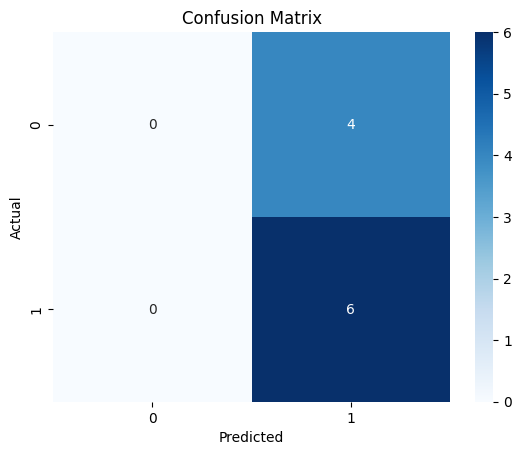

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
